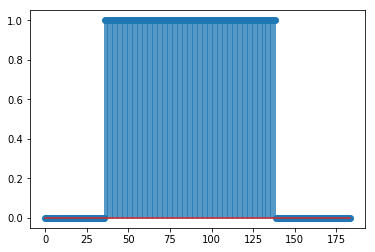

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio


FRAME_SIZE = 2048

def ece420ProcessFrame(frame):
    isVoiced = 0

    #### YOUR CODE HERE ####
    energy = np.zeros(frame.shape[0])
    for i in range(frame.shape[0]):
        energy[i] = pow(frame[i],2) 
    
    if(sum(energy)>1900000000):
        isVoiced = 1
    

    return isVoiced


################# GIVEN CODE BELOW #####################

Fs, data = read('test_vector.wav')
Audio(data,rate = Fs)

numFrames = int(len(data) / FRAME_SIZE)
framesVoiced = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    framesVoiced[i] = ece420ProcessFrame(frame.astype(float))

plt.figure()
plt.stem(framesVoiced)
plt.show()

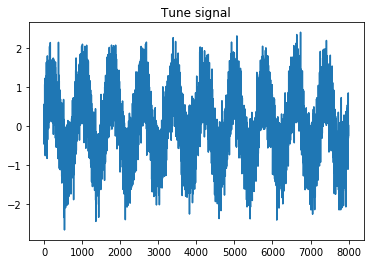

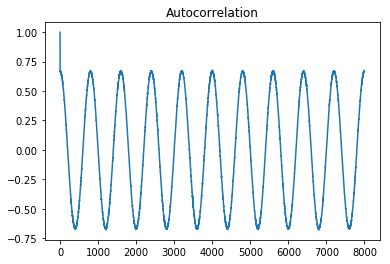

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000        # Sampling Rate is 8000
duration = 1     # 1 sec
t = np.linspace(0,duration,duration*fs)
freq = 10        # Tune Frequency is 10 Hz
tune = np.sin(2*np.pi*freq*t)

# Add some Gaussian noise 
tune += np.random.normal(0, 0.5, duration * fs)

plt.figure()
plt.title("Tune signal")
plt.plot(tune)

# Start a new figure for your autocorrelation plot 
plt.figure() 

# Your code here
correlation = np.zeros(tune.shape[0])
norm = np.zeros(tune.shape[0])
auto_corr = np.zeros(tune.shape[0])
for i in range(tune.shape[0]):
    norm[i] = pow(tune[i], 2)


for l in range(tune.shape[0]):
    for i in range(tune.shape[0]):
        correlation[i] = tune[i]*tune[i-l]
    auto_corr[l] = sum(correlation)/sum(norm)
    
plt.plot(auto_corr)
plt.title("Autocorrelation")
# Only call plt.show() at the very end of the script 
plt.show()

#### Answer:
the value of lag l is about 800 samples, which corresponds to frequency 10Hz.